**Exercise 9.21**.  The data file named `deere3` contains 57 consecutive values from a complex machine tool process at Deere & Co.  The values given are deviations from a target value in units of ten millionths of an inch.  The process employs a control
mechanism that resets some of the parameters of the machine tool depending on the magnitude of deviation from target of the last item produced.

**(a)** Using an AR(1) model for this series, forecast the next ten values.

**(b)** Plot the series, the forecasts, and 95% forecast limits, and interpret the results.

**Solution**.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Y = np.array(pd.read_csv('../data/deere3.dat')['deere3'])

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   57
Model:                     ARMA(1, 0)   Log Likelihood                -495.509
Method:                           mle   S.D. of innovations           1438.526
Date:                Thu, 14 May 2020   AIC                            997.019
Time:                        10:39:00   BIC                           1003.148
Sample:                             0   HQIC                           999.401
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        125.1317    394.191      0.317      0.751    -647.468     897.732
ar.L1.y        0.5255      0.111      4.741      0.000       0.308       0.743
                                    Roots           

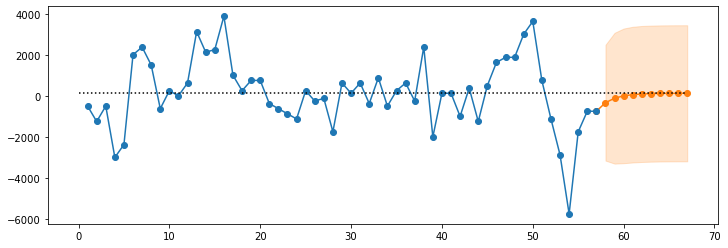

In [3]:
model = ARIMA(Y, order=(1, 0, 0)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=10)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

# Prepend last element so line is continuous
plot_data = np.r_[Y[-1], Y_pred]

n = len(Y)
m = len(Y_pred)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(n, n+m+1), plot_data, marker='o', color='C1')
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.fill_between(np.arange(n+1, n+m+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, m+n], [process_mean, process_mean], ls=':', color='black')
plt.show()

The predicted values quickly converge to the process mean -- raising the question on whether it would be better to just use the process mean as a model for a specific application.

**Exercise 9.22**.  The data file named `days` contains accounting data from the Winegard Co. of Burlington, Iowa.  The data are the number of days until Winegard receives payment for 130 consecutive orders from a particular distributor of Winegard products.  (The name of the distributor must remain anonymous for confidentiality reasons.)  The time series contains outliers that are quite obvious in the time series plot.  Replace each of the unusual values at "times" 63, 106, and 129 with the much
more typical value of 35 days.

**(a)** Use an MA(2) model to forecast the next ten values of this modified series.

**(b)** Plot the series, the forecasts, and 95% forecast limits, and interpret the results.

**Solution**.

In [4]:
Y = np.array(pd.read_csv('../data/days.dat')['days'])
Y[[62, 105, 128]] = 35

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  130
Model:                     ARMA(0, 2)   Log Likelihood                -412.226
Method:                           mle   S.D. of innovations              5.764
Date:                Thu, 14 May 2020   AIC                            832.451
Time:                        10:39:00   BIC                            843.921
Sample:                             0   HQIC                           837.112
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.1957      0.698     40.396      0.000      26.828      29.564
ma.L1.y        0.1893      0.089      2.118      0.034       0.014       0.364
ma.L2.y        0.1958      0.074      2.646      0.0

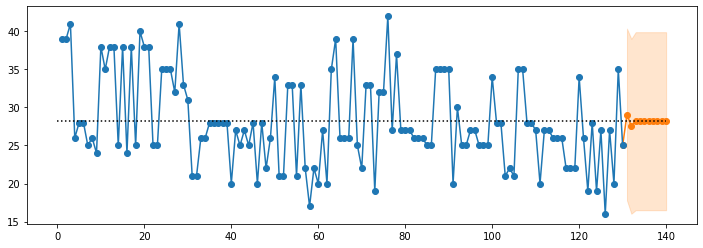

In [5]:
model = ARIMA(Y, order=(0, 0, 2)).fit(method='mle')
print(model.summary())

Y_pred, se, _ = model.forecast(steps=10)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

# Prepend last element so line is continuous
plot_data = np.r_[Y[-1], Y_pred]

n = len(Y)
m = len(Y_pred)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(n, n+m+1), plot_data, marker='o', color='C1')
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.fill_between(np.arange(n+1, n+m+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, m+n], [process_mean, process_mean], ls=':', color='black')
plt.show()

The MA(2) forecast are literally the mean after 2 steps in the future.

**Exercise 9.23**.  The time series in the data file `robot` gives the final position in the "x-direction" after an industrial robot has finished a planned set of exercises.  The measurements are expressed as deviations from a target position.  The robot is put through this planned set of exercises in the hope that its behavior is repeatable and thus predictable.

**(a)** Use an IMA(1,1) model to forecast five values ahead. Obtain 95% forecast limits also.

**(b)** Display the forecasts, forecast limits, and actual values in a graph and interpret the results.

**(c)** Now use an ARMA(1,1) model to forecast five values ahead and obtain 95% forecast limits.  Compare these results with those obtained in part (a).

**Solution**.

In [6]:
Y = np.array(pd.read_csv('../data/robot.dat')['robot'])

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  323
Model:                 ARIMA(0, 1, 1)   Log Likelihood                1480.953
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 14 May 2020   AIC                          -2955.906
Time:                        10:39:00   BIC                          -2944.573
Sample:                             1   HQIC                         -2951.382
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.274e-06   1.81e-05     -0.070      0.944   -3.67e-05    3.41e-05
ma.L1.D.y     -0.8716      0.039    -22.178      0.000      -0.949      -0.795
                                    Roots           

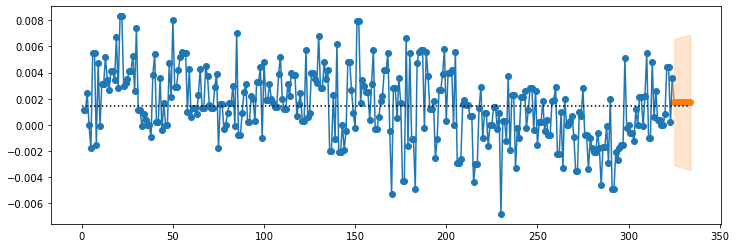

In [7]:
model_ima11 = ARIMA(Y, order=(0, 1, 1)).fit()
print(model_ima11.summary())

Y_pred, se, _ = model_ima11.forecast(steps=10)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

# Prepend last element so line is continuous
plot_data = np.r_[Y[-1], Y_pred]

n = len(Y)
m = len(Y_pred)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(n, n+m+1), plot_data, marker='o', color='C1')
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.fill_between(np.arange(n+1, n+m+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, m+n], [process_mean, process_mean], ls=':', color='black')
plt.show()

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  324
Model:                     ARMA(1, 1)   Log Likelihood                1489.303
Method:                       css-mle   S.D. of innovations              0.002
Date:                Thu, 14 May 2020   AIC                          -2970.607
Time:                        10:39:00   BIC                          -2955.484
Sample:                             0   HQIC                         -2964.570
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0015      0.000      3.105      0.002       0.001       0.002
ar.L1.y        0.9473      0.031     30.638      0.000       0.887       1.008
ma.L1.y       -0.8063      0.061    -13.240      0.0

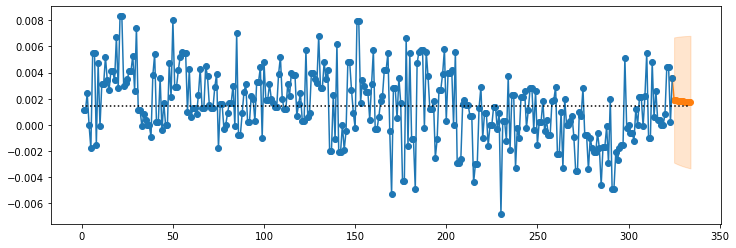

In [8]:
model_arma11 = ARIMA(Y, order=(1, 0, 1)).fit()
print(model_arma11.summary())

Y_pred, se, _ = model_arma11.forecast(steps=10)

process_mean = np.mean(Y)
z = norm.ppf(0.975)

# Prepend last element so line is continuous
plot_data = np.r_[Y[-1], Y_pred]

n = len(Y)
m = len(Y_pred)
plt.figure(figsize=(12, 4))
plt.plot(np.arange(n, n+m+1), plot_data, marker='o', color='C1')
plt.plot(np.arange(1, n+1), Y, marker='o', color='C0')
plt.fill_between(np.arange(n+1, n+m+1), Y_pred - z * se, Y_pred + z * se, alpha=0.2, color='C1')
plt.plot([0, m+n], [process_mean, process_mean], ls=':', color='black')
plt.show()

Both processes provide a forecast very close to the process mean overall, though the ARMA(1, 1) model has lower AIC and higher log-likelihood.

**Exercise 9.24**.  Exhibit 9.4 on page 206 displayed the forecasts and 95% forecast limits for the square root of the Canadian hare abundance.  The data are in the file named `hare`.  Produce a similar plot in original terms.  That is, plot the original abundance values together with the squares of the forecasts and squares of the forecast limits.

**Solution**.

In [9]:
data = pd.read_csv('../data/hare.dat')
Y = np.sqrt(np.array(data['hare']))

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   31
Model:                     ARMA(3, 0)   Log Likelihood                 -46.542
Method:                       css-mle   S.D. of innovations              1.033
Date:                Thu, 14 May 2020   AIC                            103.084
Time:                        10:39:01   BIC                            110.254
Sample:                             0   HQIC                           105.421
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6923      0.337     16.887      0.000       5.032       6.353
ar.L1.y        1.0519      0.188      5.607      0.000       0.684       1.420
ar.L2.y       -0.2292      0.294     -0.780      0.4

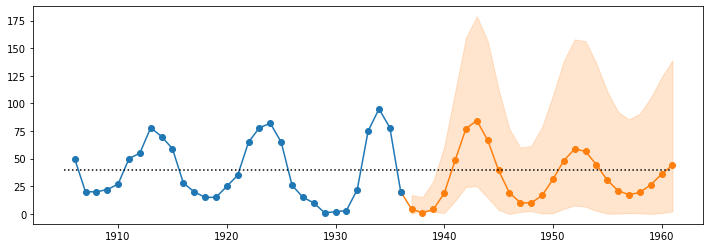

In [10]:
# Fit AR(3) model
model = ARIMA(Y, order=(3, 0, 0)).fit()
print(model.summary())

Y_pred, se, _ = model.forecast(steps=25)

process_mean = np.mean(Y**2)
z = norm.ppf(0.975)

# Prepend last element so line is continuous
plot_data = np.r_[Y[-1], Y_pred]

start_x = 1905
n = len(Y)
m = len(Y_pred)
plt.figure(figsize=(12, 4))
plt.plot(start_x + np.arange(n, n+m+1), plot_data**2, marker='o', color='C1')
plt.plot(start_x + np.arange(1, n+1), Y**2, marker='o', color='C0')
plt.fill_between(start_x + np.arange(n+1, n+m+1), (Y_pred - z * se)**2, (Y_pred + z * se)**2, alpha=0.2, color='C1')
plt.plot([start_x + 0, start_x + m+n], [process_mean, process_mean], ls=':', color='black')
plt.show()

The squared plot presents confidence intervals that are obviously imbalanced, as the recursion was performed on the square root of the values.

**Exercise 9.25**.  Consider the seasonal means plus linear time trend model for the logarithms of the monthly electricity generation time series in Exercise 9.8.  (The data are in the file named `electricity`.)

**(a)** Find the two-year forecasts and forecast limits in original terms.  That is, exponentiate (antilog) the results obtained in Exercise 9.8.

**(b)** Plot the last five years of the original time series together with two years of forecasts and the 95% forecast limits, all in original terms.  Interpret the plot.

**Solution**.

In [11]:
data = pd.read_csv('../data/electricity.dat')
data['date'] = pd.date_range('1973-01', periods=len(data), freq='M')
data['t'] = data['date'].dt.year + (data['date'].dt.month - 1) / 12
data['month'] = data['date'].dt.month

                             OLS Regression Results                            
Dep. Variable:     np.log(electricity)   R-squared:                       0.975
Model:                             OLS   Adj. R-squared:                  0.975
Method:                  Least Squares   F-statistic:                     1262.
Date:                 Thu, 14 May 2020   Prob (F-statistic):          2.63e-299
Time:                         10:39:01   Log-Likelihood:                 711.56
No. Observations:                  396   AIC:                            -1397.
Df Residuals:                      383   BIC:                            -1345.
Df Model:                           12                                         
Covariance Type:             nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -37.8299      0.4

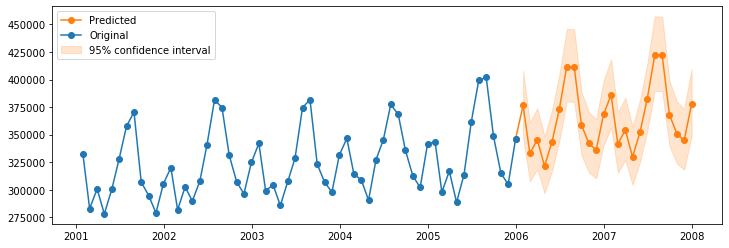

In [12]:
model = ols("np.log(electricity) ~ t + C(month)", data=data).fit()
print(model.summary())

sigma_e = np.sqrt(model.scale)
z = norm.ppf(0.975)

new_data = pd.DataFrame()
new_data['date'] = pd.date_range('2006-01', periods=12*2, freq='M')
new_data['t'] = new_data['date'].dt.year + (new_data['date'].dt.month - 1) / 12
new_data['month'] = new_data['date'].dt.month

new_data['electricity'] = np.exp(model.predict(new_data))


plt.figure(figsize=(12, 4))

# Prepend last element so line is continuous
plot_data = pd.concat([data.tail(1), new_data])

plt.plot(
    plot_data['date'], plot_data['electricity'], 
    marker='o', color='C1', label='Predicted'
)

plt.plot(
    data[data['t'] >= 2001]['date'], data[data['t'] >= 2001]['electricity'], 
    marker='o', color='C0', label='Original'
)
plt.fill_between(
    new_data['date'], 
    np.exp(np.log(new_data['electricity']) - z * sigma_e), 
    np.exp(np.log(new_data['electricity']) + z * sigma_e),
    color='C1',
    alpha=0.2,
    label='95% confidence interval'
)

plt.legend(loc='upper left')
plt.show()

Results are very similar to the ones in exercise 9.8 -- the log / exponentiation does not make much of an impact visually for sufficiently large values that change over a small range.